# Foundations 3: Lab on connectivity and graph theory
- Instructor: Ruben Sanchez-Romero
- T.A: Jaleesa Longfellow

## 1. load packages

In [1]:
# for mathematical operations on arrays: https://numpy.org/
import numpy as np 

# for plotting: https://matplotlib.org/
import matplotlib.pyplot as plt

# for statistical analysis: https://scipy.org/
from scipy import stats

## need to decide the FC analysis

# for graph theory we will used a Python implementation of Brain Connectivity Toolbox BCT (Matlab native)
# https://sites.google.com/site/bctnet/ (For documentation. Search bar in the top right)

# if bctpy package not installed:
# in a terminal window from Jupyter type: pip install bctpy
# then Restart the kernel and run this cell again
import bct as bct

## 2. Build two graphical models

In [181]:
# 1. Define number of nodes
num_nodes_model = 128

print(f'num_nodes_model = {num_nodes_model}')

num_nodes_model = 128


In [182]:
# 2. Define number of undirected edges (won't be covering directed networks in this lab)
num_poss_edges_model = (num_nodes_model * (num_nodes_model-1))/2  # number of possible undirected edges
density_model = 0.30 # density = % of num_poss_edges
num_edges_model = int(np.round(num_poss_edges_model*density_model)) # round to get an integer

print(f'num_poss_edges_model = {int(num_poss_edges)}')
print(f'density_model = {density}')
print(f'num_edges_model = {int(num_edges)}')

num_poss_edges_model = 8128
density_model = 0.3
num_edges_model = 2438


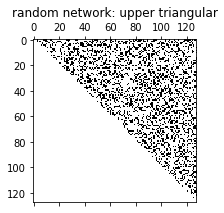

In [183]:
# 3. Call bct to generate a random network: it connects pair of nodes with the same probability p
# (seed parameter is the random seed and it is used for reproducibility)
graph_random_upt = bct.makerandCIJ_und(n=num_nodes_model,
                                       k=num_edges_model, 
                                       seed = 100)

# plot the resulting graph (binary: edge or no edge)
plt.figure(figsize=(3,3))
plt.spy(graph_random_upt)
plt.title('random network: upper triangular')
plt.show()

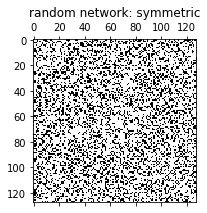

In [184]:
# 3.A. bct.makerandCIJ_und produces an upper triangular matrix. We want a symmetric matrix
graph_random = (graph_random_upt + graph_random_upt.T) != 0 

# plot the resulting graph (binary: edge or no edge)
plt.figure(figsize=(3,3))
plt.spy(graph_random)
plt.title('random network: symmetric')
plt.show()

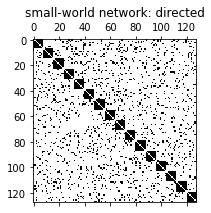

In [211]:
##TODO: fix density of small-world model

# 4. Call bct to generate a modular small-world network
# (sz_cl parameter defines the number of nodes in a clusters)
graph_smallworld_dir = bct.makeevenCIJ(n = num_nodes_model, 
                                       k = num_edges_model, # multiply by 2, due to direct network 
                                       sz_cl = 3, 
                                       seed = 100)

# plot the graph
plt.figure(figsize=(3,3))
plt.spy(graph_smallworld_dir)
plt.title('small-world network: directed')
plt.show()

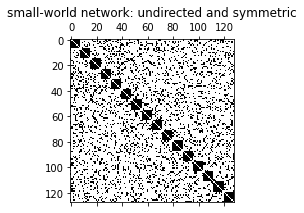

In [212]:
# 4.A. bct.makeevenCIJ produces a directed network, so we want to make it undirected and symmetrix
graph_smallworld = (graph_smallworld_dir + graph_smallworld_dir.T) != 0

# plot the graph
plt.figure(figsize=(3,3))
plt.spy(graph_smallworld)
plt.title('small-world network: undirected and symmetric')
plt.show()

## 3. Compute basic descriptive metrics

### nodes, edges and density

In [213]:
# Since we are working with symmetric matrices we can use numpy tools

# first do it for the random network
print(f'random network')

# 1. Compute the number of nodes 
# np.shape output the size of the matrix (rows,columns), for our symmetric case rows = columns,
# and they correspond to the number of nodes in the graph
n_nodes = np.shape(graph_random)[0]
print(f'number of nodes = {n_nodes}')
# 2. Compute number of edges
n_edges = np.sum(np.sum(graph_random != 0))/2
print(f'number of edges = {int(n_edges)}')
# 3. Compute density of the undirected network
n_poss_edges = ((n_nodes)*(n_nodes-1))/2
density = n_edges/n_poss_edges
print(f'density = {density:.2f}')
print('')

# repeat for the small-world network
print(f'small-world network')

# 1. Compute the number of nodes 
n_nodes = np.shape(graph_smallworld)[0]
print(f'number of nodes = {n_nodes}')
# 2. Compute number of edges
n_edges = np.sum(np.sum(graph_smallworld != 0))/2
print(f'number of edges = {int(n_edges)}')
# 3. Compute density of the undirected network
n_poss_edges = ((n_nodes)*(n_nodes-1))/2
density = n_edges/n_poss_edges
print(f'density = {density:.2f}')

random network
number of nodes = 128
number of edges = 2438
density = 0.30

small-world network
number of nodes = 128
number of edges = 1915
density = 0.24


### degree

The degree of a node is the number of edges connected to such node.

random network


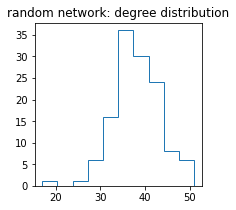

degree distribution = 38.09

small-world network


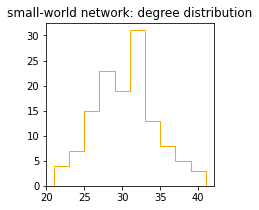

degree distribution = 29.92


In [214]:
# as before we can use numpy tools to compute the degree of the undirected network
# first do it for the random network
print(f'random network')
# 1. First compute the degree for each node independently
# this will output a vector where each entry contains the degree of each ordered node
degree_distribution = np.sum(graph_random != 0, axis=1)

# 2. We can do a histogram of the distribution to explore the variability of the degree across nodes
plt.figure(figsize=(3,3))
plt.hist(degree_distribution,histtype='step')
plt.title('random network: degree distribution')
plt.show()
# this kind of normal distribution of degree distribution is characteristic of random networks

# 3. Now compute the mean of the degree distribution
degree_mean = np.mean(degree_distribution)
print(f'degree distribution = {degree_mean:.2f}')
print('')

# Repear for the small-world network

print(f'small-world network')
# 1. Compute degree distribution
degree_distribution = np.sum(graph_smallworld != 0, axis=1)
# 2. Plot degree distribution
plt.figure(figsize=(3,3))
plt.hist(degree_distribution,histtype='step',color='orange')
plt.title('small-world network: degree distribution')
plt.show()
# this kind of normal distribution of degree distribution is characteristic of random networks

# 3. Mean of the degree distribution
degree_mean = np.mean(degree_distribution)
print(f'degree distribution = {degree_mean:.2f}')